# Ejercicio 2 - Ascensor

En un edificio existen tres ascensores que funcionan de manera simultanea. Se quiere crear un sistema que para cada  llamada realizada por cualquier usuario en cualquier piso asigne a cada ascensor un nivel de prioridad dependiendo de el estado en el que se encuentre y seleccione a aquel con mayor prioridad a la respuesta de dicho llamado.

Los elementos a tener en cuenta son:

### Distancia relativa

Distancia entre la llamada y la ubicación actual del ascensor.
Se calcula como:

<b>DR</b> = 0 Si el ascensor está en camino al piso llamado
   IF Está quieto 
      <b>DR</b>= |PISO ACTUAL - PISO DEL LLAMADO|
   ELSE DR= |PISO DESTINO MAS CERCANO - PISO DEL LLAMADO|

Los conjuntos de pertenencia estarán dados de la siguiente manera:

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Triangular</td><td>[0 0 2]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[1 3 6]</td><td>Media</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 8 9 9]</td><td>Alta</td>
    </tr>
</table>


### Tiempo de espera


<b>TE</b> =|PISO ACTUAL - PISO DEL LLAMADO|

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Trapecio</td><td>[0 0 2 4]</td><td>Corto</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[2 4.5 7]</td><td>Medio</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 7 9 9]</td><td>Largo</td>
    </tr>
</table>

<br>

### Capacidad

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Trapecio</td><td>[0 0 2 4]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[2 4.5 7]</td><td>Media</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 7 9 9]</td><td>Alta</td>
    </tr>
</table>

<br>

### Prioridad

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Triangular</td><td>[0 0 0.5]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[0.25 0.5 0.75]</td><td>Media</td>
    </tr>
     <tr>
        <td>Triangular</td><td>[0.5 1 1]</td><td>Alta</td>
    </tr>
</table>



 - Definir un conjunto de reglas para establecer las prioridades a asignar en cada caso
 - Hacer diversas pruebas y verificar que los resultados sean consistentes

In [32]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

<b>Fuente:</b> https://github.com/shubhamgupta1404/Fuzzy-Elevator-Control-System/blob/master/FuzzyLogicElevatorSystemPaper.pdf

# Antecendentes
Definir y graficar los antecedentes para el problema.

G:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


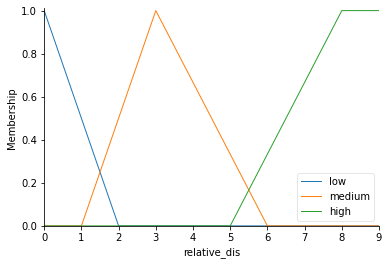

In [33]:
relative_dis = ctrl.Antecedent(np.arange(0, 10, 1), "relative_dis")
relative_dis["low"] = fuzz.trimf(relative_dis.universe, [0, 0, 2])
relative_dis["medium"] = fuzz.trimf(relative_dis.universe, [1, 3, 6])
relative_dis["high"] = fuzz.trapmf(relative_dis.universe, [5, 8, 9, 9])
relative_dis.view()

# Awaiting time

G:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


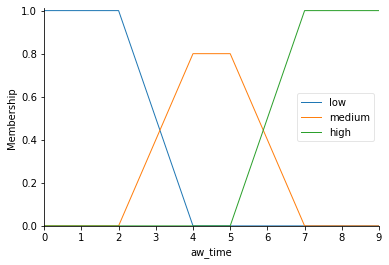

In [34]:
aw_time = ctrl.Antecedent(np.arange(0, 10, 1), "aw_time")
aw_time["low"] = fuzz.trapmf(relative_dis.universe, [0, 0, 2, 4])
aw_time["medium"] = fuzz.trimf(relative_dis.universe, [2, 4.5, 7])
aw_time["high"] = fuzz.trapmf(relative_dis.universe, [5, 7, 9, 9])
aw_time.view()

# Capacity

G:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


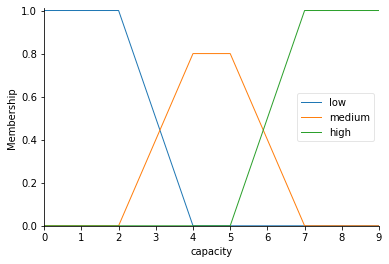

In [35]:
capacity = ctrl.Antecedent(np.arange(0, 10, 1), "capacity")
capacity["low"] = fuzz.trapmf(relative_dis.universe, [0, 0, 2, 4])
capacity["medium"] = fuzz.trimf(relative_dis.universe, [2, 4.5, 7])
capacity["high"] = fuzz.trapmf(relative_dis.universe, [5, 7, 9, 9])
capacity.view()

# Consecuentes 

# Priority

G:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


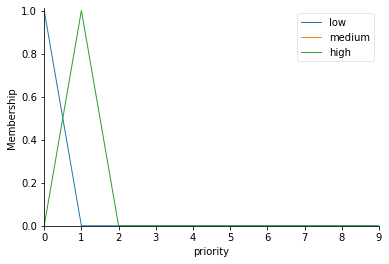

In [36]:
priority = ctrl.Consequent(np.arange(0, 10, 1), "priority")
priority["low"] = fuzz.trimf(relative_dis.universe, [0, 0, 0.5])
priority["medium"] = fuzz.trimf(relative_dis.universe, [0.25, 0.5, 0.75])
priority["high"] = fuzz.trimf(relative_dis.universe, [0.5, 1, 1])
priority.view()

# Rules

In [37]:
priority.defuzzify_method = "mom"

rules = []
rules.append(ctrl.Rule(aw_time["low"] | capacity["low"] | relative_dis["low"], priority["high"]))
rules.append(ctrl.Rule(aw_time["medium"] | relative_dis["medium"] | capacity["medium"], priority["medium"]))
rules.append(ctrl.Rule(aw_time["high"] | relative_dis["high"] | capacity["high"], priority["low"]))


# Simulation

In [38]:
ctrSys = ctrl.ControlSystem(rules)
elevators = ctrl.ControlSystemSimulation(ctrSys)
elevators.input["capacity"] = 2
elevators.input["relative_dis"] = 1
elevators.input["aw_time"] = 1
elevators.compute()
elevators.print_state()
print(f"prioridad: {elevators.output['priority']}")

 Antecedents 
Antecedent: aw_time                 = 1
  - low                             : 1.0
  - medium                          : 0.0
  - high                            : 0.0
Antecedent: capacity                = 2
  - low                             : 1.0
  - medium                          : 0.0
  - high                            : 0.0
Antecedent: relative_dis            = 1
  - low                             : 0.5
  - medium                          : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF (aw_time[low] OR capacity[low]) OR relative_dis[low] THEN priority[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - aw_time[low]                                           : 1.0
  - capacity[low]                                          : 1.0
  - relative_dis[low]                                      : 0.5
      (aw_time[low] OR capacity[low]) OR relative_dis[low] = 1.0
  Activation (THEN-clause):
          